In [1]:
library('readr')
library('magrittr')
library('dplyr')
library('tidyr')
library('ggplot2')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [10]:
ko_summary <-
    read_tsv(
        'flow-data.tsv',
        col_types=cols(
            `Donor`=col_factor(levels=c('D14', 'D15')),
            `Replicate`=col_factor(levels=c('R1', 'R2', 'R3')),
            `sgRNA`=col_factor(levels=c('N/A', 'CD4')),
            .default=col_double()
        )
    ) %>%
    mutate(
        `Donor`=factor(`Donor`, labels=c('Donor 14', 'Donor 15')),
        `sgRNA`=factor(`sgRNA`, labels=c('None', 'CD4'))
    ) %>%
    group_by(`Donor`, `sgRNA`) %>%
    summarize(
        `avg_cd4`=mean(`Live/CD4+ CD8- | Freq. of Parent`),
        `sd_cd4`=sd(`Live/CD4+ CD8- | Freq. of Parent`)
    )

ko_summary

Donor,sgRNA,avg_cd4,sd_cd4
Donor 14,None,78.566667,6.726316
Donor 14,CD4,9.806667,1.035197
Donor 15,None,83.200000,11.171840
Donor 15,CD4,11.666667,1.607275


In [12]:
1.0 - (9.806667 / 78.566667)

[1] 0.8751803

In [13]:
1.0 - (11.666667 / 83.200000)

[1] 0.8597756

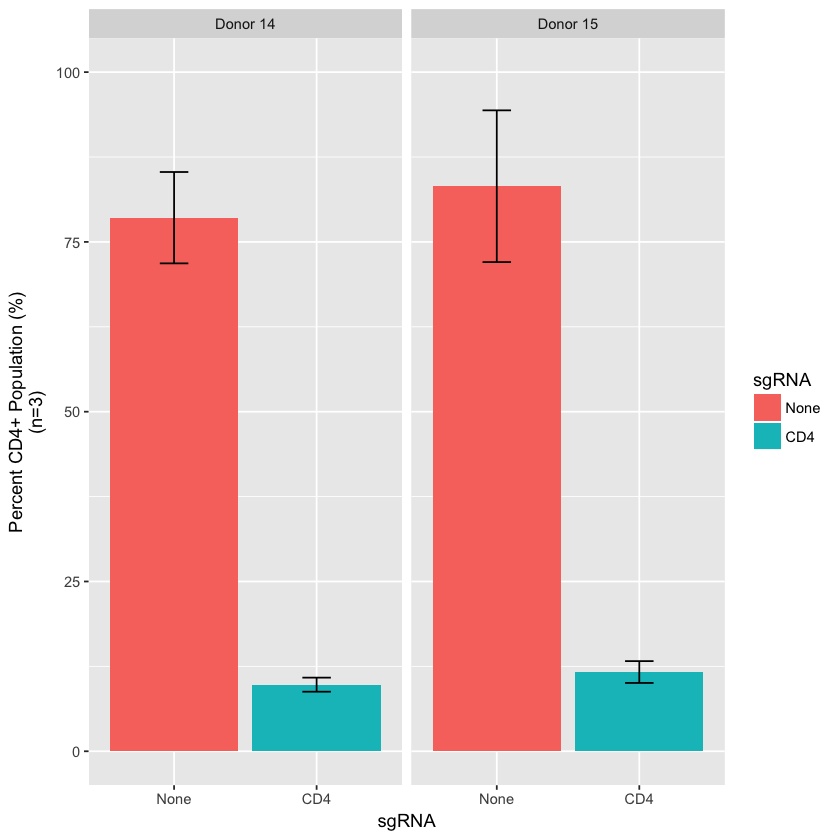

In [11]:
ko_summary %>%
ggplot(aes(x=`sgRNA`, y=`avg_cd4`, fill=`sgRNA`)) +
    geom_col() +
    geom_errorbar(aes(
        ymin=`avg_cd4`-`sd_cd4`,
        ymax=`avg_cd4`+`sd_cd4`
    ), width=.2) +
    facet_wrap(~Donor, ncol=2) +
    ylab('Percent CD4+ Population (%)\n(n=3)') +
    ylim(0, 100)